### (1) load_digits: 손글씨 분류

**project progress purpose**

* (1) understanding data
    * Feature Data 지정
    * Label Data 지정
    * Target Names 출력
    * Data Describe

* (2) train, test data separation

* (3) learning with various models
    * Decision Tree
    * Random Forest
    * SVM
    * SGD Classifier
    * Logistic Regression

* (4) evaluation models

**necessary module import**

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**data preparation**

In [3]:
digits = load_digits()

print(dir(digits))
print(digits.data.shape)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
(1797, 64)


: 데이터는 총 1,797개가 있으며, 각 데이터는 64개의 숫자로 이루어져 있다.

In [4]:
digits_data = digits.data
digits_label = digits.target

print(digits_data.shape)
print(digits_data[0]) # 64개의 배열로 이루어진 배열로 출력됨.
print(digits_label.shape)

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(1797,)


: 즉, 길이 64의 숫자 배열은 8*8 크기의 이미지를 일렬로 쭉 펴놓은 것

In [5]:
print(digits_label)

[0 1 2 ... 8 9 8]


In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

* 객체의 개수: 1797개
* 속성의 개수: 64개
* 결측치 개수: 0개
* 속성 정보: 0~16 범위의 정수형 픽셀 8x8 이미지

**train_test_split() 함수를 이용한 train, test분리**

In [8]:
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size=0.2,
                                                   random_state=20)

**data check**

In [10]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (1437, 64)
y_train : (1437,)
X_test : (360, 64)
y_test : (360,)


**model 학습**

In [11]:
y_pred_dict = {}   # 모델별 예측값을 한꺼번에 시각화 시켜주기 위해 리스트에 변수추가

* Decision Tree

In [12]:
decision_model = DecisionTreeClassifier(random_state=20)
decision_model.fit(X_train, y_train)
y_pred = decision_model.predict(X_test)
# 예측값 딕셔너리에 추가
y_pred_dict['Decision Tree'] = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.79      0.84      0.81        31
           2       0.92      0.86      0.89        28
           3       0.89      0.87      0.88        38
           4       0.88      0.85      0.86        41
           5       0.81      0.88      0.84        33
           6       0.95      0.89      0.92        45
           7       0.88      0.93      0.90        40
           8       0.79      0.77      0.78        35
           9       0.79      0.81      0.80        32

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



* Random Forest

In [13]:
random_forest_model = RandomForestClassifier(random_state = 40)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
# 예측값 딕셔너리에 추가
y_pred_dict['RandomForest'] = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        38
           4       1.00      0.98      0.99        41
           5       0.97      0.97      0.97        33
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        40
           8       0.97      1.00      0.99        35
           9       0.94      0.94      0.94        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



* SVM

In [14]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
# 예측값 딕셔너리에 추가
y_pred_dict['SVM'] = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        38
           4       1.00      0.98      0.99        41
           5       0.97      0.97      0.97        33
           6       1.00      0.98      0.99        45
           7       1.00      1.00      1.00        40
           8       0.94      0.97      0.96        35
           9       0.94      0.94      0.94        32

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



* SGD

In [15]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
# 예측값 딕셔너리에 추가
y_pred_dict['SGD'] = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.88      0.97      0.92        31
           2       1.00      1.00      1.00        28
           3       0.95      1.00      0.97        38
           4       1.00      0.95      0.97        41
           5       1.00      0.94      0.97        33
           6       0.98      0.98      0.98        45
           7       1.00      0.97      0.99        40
           8       0.92      0.97      0.94        35
           9       0.97      0.91      0.94        32

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



* Logistic Regression

In [16]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
# 예측값 딕셔너리에 추가
y_pred_dict['Logistic Regression'] = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      0.97      0.95        31
           2       1.00      1.00      1.00        28
           3       0.95      1.00      0.97        38
           4       1.00      0.98      0.99        41
           5       0.97      0.97      0.97        33
           6       1.00      0.98      0.99        45
           7       1.00      0.97      0.99        40
           8       0.97      1.00      0.99        35
           9       0.97      0.94      0.95        32

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**딕셔너리 합치기**

In [17]:
final_data = {}
for name, score in y_pred_dict.items():
    final_data[name] = {'accuracy' : score['accuracy'], 
                        **score['macro avg'],
                       **score['macro avg'],
                       **score['macro avg']} # 딕셔너리 자료형 merge 

final_data[name]

{'accuracy': 0.9805555555555555,
 'precision': 0.9797161127403061,
 'recall': 0.9803326439056178,
 'f1-score': 0.979849347985897,
 'support': 360}

**데이터프레임으로 변경**

In [18]:
df_data = pd.DataFrame(final_data)
df_data

,Decision Tree,RandomForest,SVM,SGD,Logistic Regression
accuracy,0.869444,0.988889,0.983333,0.969444,0.980556
precision,0.867171,0.987942,0.982039,0.969572,0.979716
recall,0.866751,0.988281,0.983201,0.968881,0.980333
f1-score,0.866373,0.988077,0.982549,0.968623,0.979849
support,360.000000,360.000000,360.000000,360.000000,360.000000


**데이터프레임 행/열 변경**

In [19]:
# .T(전치 행렬)도 가능
df_final_data = df_data.transpose()
df_final_data

,accuracy,precision,recall,f1-score,support
Decision Tree,0.869444,0.867171,0.866751,0.866373,360.0
RandomForest,0.988889,0.987942,0.988281,0.988077,360.0
SVM,0.983333,0.982039,0.983201,0.982549,360.0
SGD,0.969444,0.969572,0.968881,0.968623,360.0
Logistic Regression,0.980556,0.979716,0.980333,0.979849,360.0


**데이터프레임 시각화**

: barplot사용 <br/>
sns.barplot(x,y,data,..,)<br/>
-data: DataFrame
-x, y: 컬럼 참조

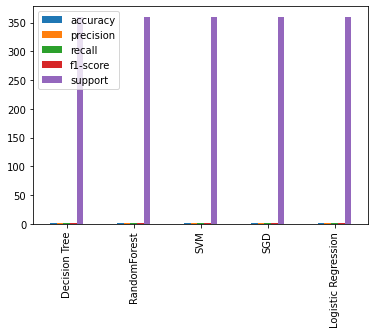

In [20]:
df_final_data.plot(kind='bar')
plt.show()
# sns.barplot(x = "model_name", y = "score", hue = 'class', data = df_final_data)

: support 열은 데이터를 평가 하기에 좋지 않은 열이므로 제거

**데이터프레임 내에 필요없는 컬럼 제거**

In [21]:
del df_final_data['support']
df_final_data

,accuracy,precision,recall,f1-score
Decision Tree,0.869444,0.867171,0.866751,0.866373
RandomForest,0.988889,0.987942,0.988281,0.988077
SVM,0.983333,0.982039,0.983201,0.982549
SGD,0.969444,0.969572,0.968881,0.968623
Logistic Regression,0.980556,0.979716,0.980333,0.979849


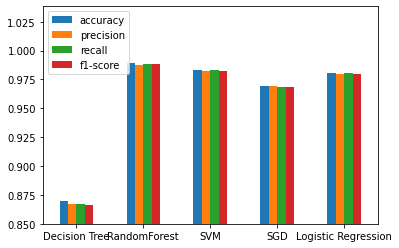

In [29]:
df_final_data.plot(kind = 'bar', ylim=0.85, rot=0)

plt.show()

**최적 모델**

* accuracy를 놓고 보자면 random_forest 모델의 정확도가 가장 높게 나타났다.
* digits 데이터를 놓고 보자면 다른 평가지표에 크게 영향을 받지 않으므로, 정확도만 평가지표로 놓고 봐도 무방할 듯 하다.